# Notebook for Colab Pro Environment 

In [ ]:
!!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c tabular-playground-series-oct-2021

# **TPS - Sep 2021**

## **Simple Baseline Using Pycaret (AutoML)**

## **You should run this notebook at least**

*   RAM > 20GB



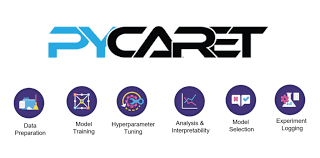

<h4> PyCaret is an open source, low-code machine learning library in Python that allows you to go from preparing your data to deploying your model within minutes in your choice of notebook environment.</h4>

### [Click Here](https://pycaret.org/) to visit pycaret.org

# **Install Pycaret, Import Library**

In [ ]:
!pip install pycaret[full]

import pandas as pd
import numpy as np
import gc
from lightgbm import LGBMClassifier
from pycaret.classification import *

# **Load Data**

In [ ]:
train = pd.read_csv('/content/train.csv.zip')
test = pd.read_csv('/content/test.csv.zip')

In [ ]:
train.drop(columns = 'id', inplace = True)
test.drop(columns = 'id', inplace = True)

# **Modeling**

## Blending Ensemble
* LightGBM
* Catboost
* Xgboost

In [ ]:
def pycaret_model(train, target, test, fold):
    
    print('Setup Your Data....')
    setup(data=train,
        target=target,
        silent= True,
        use_gpu=True,
        normalize = True,
        normalize_method = 'robust',
        session_id = 42)
    
    print('Creating Models....')
    
    model_list = []
    lgbm = create_model(estimator = 'lightgbm', fold = fold)
    xgb = create_model(estimator = 'xgboost', fold = fold)
    cat = create_model(estimator = 'catboost', fold = fold)
    
    model_list.append(lgbm)
    model_list.append(xgb)
    model_list.append(cat)
    
    print('Blending Models....')
    blended = blend_models(estimator_list= model_list, fold=fold)
    pred_holdout = predict_model(blended)

    print('Finallizing Models....')
    final_model = finalize_model(blended)

    print('Done...!!!')

    prep_pipe = get_config('prep_pipe')
    prep_pipe.steps.append(['trained_model', final_model])
    pred = prep_pipe.predict_proba(test)

    return pred

In [ ]:
result = pycaret_model(train, 'target', test, 5)
result

In [ ]:
sub = pd.read_csv('/content/sample_submission.csv.zip')
sub['target'] = result[:, 1]
sub

In [ ]:
sub.to_csv('sub.csv', index = 0)

# For public LB

In [ ]:
sub = pd.read_csv('../input/tps-oct-pycaret-submission/sub (21).csv')
sub.to_csv('sub.csv', index = 0)